In [2]:
# load numpy, a scientific computing package
# load matplotlib.pyplot, a framework provides MATLAB-like plotting
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

### Background
In some commmunication systems, a symbols are transmitted as points in the (x,y) plane distributed equally around the unit circle. For example, if we wish to transmit 8 symbols, we can transmit points on the unit circle separated in angle by $\frac{2 \pi}{8}$ radians as shown below.

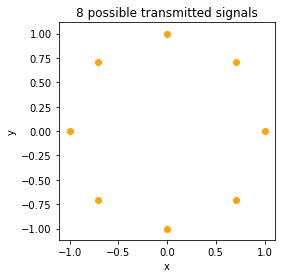

In [3]:
# create n_symbol values of k from 0 to n_symbol-1
n_symbol = 8
k = np.arange(0,n_symbol,1)

# compute the values of the 8 possible transmitted signals
x_sym = np.cos(2*np.pi*k/8)
y_sym = np.sin(2*np.pi*k/8)

# plot the 8 possible transmitted signals as a scatter plot
fig, ax = plt.subplots()
ax.scatter(x_sym,y_sym,color='orange')
ax.set_title('8 possible transmitted signals')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')
plt.show()

However, in many cases, the recieved data is corrupted by noise. For example, in the following we assume that the datapoints are corrupted by noise in the x and y directions which are drawn from independent Gaussian distributions with standard deviation sigma. In the following, we show a scatter plot of the noisy received data for a relatively small value of sigma.

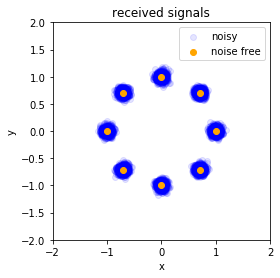

In [4]:
sigma = 0.05

# number of noisy examples for each data point
n_points = 1000
k_noise = np.repeat(k,n_points)

# create transmitted signals corrupted by Gaussian noise
noise_rv = scipy.stats.norm(loc=0,scale=sigma)
x_noise=np.cos(2*np.pi*k_noise/8) + noise_rv.rvs(size=n_symbol*n_points)
y_noise=np.sin(2*np.pi*k_noise/8) + noise_rv.rvs(size=n_symbol*n_points)

# scatter plot the noisy received data
fig, ax = plt.subplots()

ax.scatter(x_noise,y_noise,color='b', alpha = 0.1, label = 'noisy')
ax.scatter(x_sym,y_sym,color = 'orange', label = 'noise free')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_title('received signals')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')
ax.legend()
plt.show()

To make this clearer, let's just show noise corrupted received signals, assuming that only symbol 0 is sent.

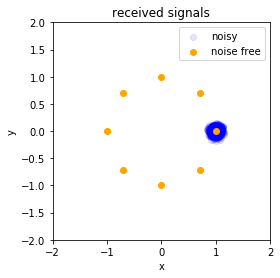

In [5]:
sigma = 0.05

# number of noisy examples for each data point
n_points = 2000
k_noise = np.repeat(0,n_points)

# create transmitted signals corrupted by Gaussian noise
noise_rv = scipy.stats.norm(loc=0,scale=sigma)
x_noise = np.cos(2*np.pi*k_noise/8) + noise_rv.rvs(size=n_points)
y_noise = np.sin(2*np.pi*k_noise/8) + noise_rv.rvs(size=n_points)

# scatter plot the noisy received data
fig, ax = plt.subplots()

ax.scatter(x_noise,y_noise,color = 'blue', alpha = 0.1, label = 'noisy')
ax.scatter(x_sym,y_sym,color = 'orange', label = 'noise free')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_title('received signals')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')
ax.legend()
plt.show()

We typically decode the received signals by mapping them to the closest noise free symbols. This leads to some symbols being incorrectly decoded. We define below a function called decode, that takes the noisy data and decodes it to one of the n_symbol=8 points encoded as the points (x,y)

In [6]:
def decode ( x_noise, y_noise, x, y) :
    "This function returns a vector of decoded symbol values"
    
    n_points = np.size(x_noise);
    n_symbol = np.size(x);

    xdiff = np.ones((n_symbol,1)) * np.reshape(x_noise,(1,n_points)) - np.reshape(x,(n_symbol,1)) * np.ones((1,n_points))
    ydiff = np.ones((n_symbol,1)) * np.reshape(y_noise,(1,n_points)) - np.reshape(y,(n_symbol,1)) * np.ones((1,n_points))
    dsquared = np.square(xdiff) + np.square(ydiff)
    k_dec = np.argmin(dsquared,axis = 0)
    return k_dec

We call this function below. Ideally, it should return all zeros. The error rate is the precentage of non-zero entries in k_dec. Since the noise level sigma is small, the error rate should be close to zero.

In [7]:
k_dec = decode( x_noise, y_noise, x_sym, y_sym)
error_rate = np.count_nonzero(k_dec)/n_points
print('The empirical estimate of the error_rate is',error_rate)

The empirical estimate of the error_rate is 0.0


However, if sigma is large enough, this can lead to bit errors, as shown below,

In [8]:
sigma = 0.25

# create transmitted signals corrupted by Gaussian noise
noise_rv = scipy.stats.norm(loc=0,scale=sigma)
x_noise=np.cos(2*np.pi*k_noise/8) + noise_rv.rvs(size=n_points)
y_noise=np.sin(2*np.pi*k_noise/8) + noise_rv.rvs(size=n_points)

k_dec = decode( x_noise, y_noise, x_sym, y_sym)
error_rate = np.count_nonzero(k_dec)/n_points
print('The empirical estimate of the error_rate is',error_rate)

The empirical estimate of the error_rate is 0.131


To see what is going on, we plot a scatter plot of the received signal.

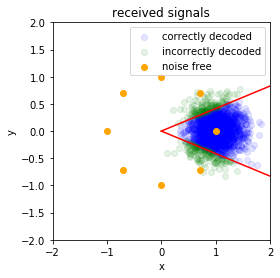

In [9]:
# scatter plot the noisy received data
fig, ax = plt.subplots()

ax.scatter(x_noise[k_dec==0],y_noise[k_dec==0],color = 'blue', alpha = 0.1, label = 'correctly decoded')
ax.scatter(x_noise[k_dec!=0],y_noise[k_dec!=0],color = 'green', alpha = 0.1, label = 'incorrectly decoded')
ax.scatter(x_sym,y_sym,color='orange', label = 'noise free')
ax.plot([0,2],[0,2*np.tan(np.pi/8)],color = 'red')
ax.plot([0,2],[0,2*np.tan(-np.pi/8)],color = 'red')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_title('received signals')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')
ax.legend()
plt.show()

Due to the noise, some of the received signals will be closer to the noise free versions of the other symbols (e.g. symbol 1 at $\pi/4$ and symbol 7 at $-\pi/4$). It turns out that the boundary line between deciding between symbol 0 and symbol 1 is the radial line extending out from the origin at an angle $\pi/8$. The boundary line between deciding between symbol 0 and symbol 7 is the radial line extending out from the origin at an angle $-\pi/8$. These lines are show in red. If the noise is big enough that the received signal strays outside the wedge, the symbol is incorrectly decoded (plotted in green.)

### Questions

**Part a:** To find the points that are incorrectly decoded as belonging to symbol 1, we note that these are the received signals lying above the upper red line, i.e. $y > \tan(\pi/8) x$. If we define $z = y - \tan(\pi/8) x$, then the points where $z > 0$ are misclassified.

For symbol 0, the received values of $x$ and $y$ are independent Gaussian random variables with and means 1 and 0 respectively and standard deviation $\sigma$. Since $z$ is a linear combination of $x$ and $y$, $z$ is also a Gaussian random variable. Find the mean and standard deviation of $z$ as a function of $\sigma$. This is a theoretical, rather than mathematical question

**Answer:** 

$mean_z = mean_y - tan(\pi/8)mean_x = -tan(\pi/8)$ 

$var_z = var_x + tan(\pi/8)^{2}var_x = (1 + tan(\pi/8)^{2})\sigma^{2}$

$std_z = (1 + tan(\pi/8)^{2})^{1/2}\sigma$

**Part b:** Find the numerical mean and standard deviation of z for the value of sigma used above (sigma = 0.25).

In [21]:
z = y_noise - np.tan(np.pi/8) * x_noise
np.mean(z), np.std(z)

(-0.40835457688532634, 0.26584563215813406)

**Part c:** Check your work by comparing the theoretically estimated pdf of z with the empirical histogram, which we have generated an plotted for you below. You can generate the theoretical pdf using scipy.stats.norm.pdf()

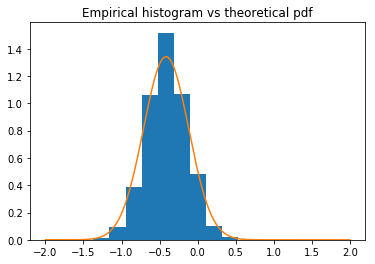

In [27]:
z = y_noise - np.tan(np.pi/8) * x_noise
fig, ax = plt.subplots()
x = np.linspace(-2,2,20)
ax.hist(z,bins = x,density=True)
ax.set_title('Empirical histogram vs theoretical pdf')

# put your code to generate the theoretical histogram here
x_dense = np.linspace(-2, 2, 1000)
ax.plot(x_dense, scipy.stats.norm.pdf(x_dense, -np.tan(np.pi/8), np.sqrt(1 + np.tan(np.pi/8)) * 0.25))

plt.show()

**Part d:** Obtain a theoretical estimate of the error rate by doubling the probability that z > 0.  You can calculate this using the survival function scipy.stats.norm.sf() or the cumulative distribution function scipy.stats.norm.cdf(). Note that we double the probability since we need to take into account errors due to misclassifying as symbol 7. By symmetry, this similar to the probability that z > 0.

**Part e:** Compare the theoretical estimate with the empirical estimate. You can run the code below multiple times to get an idea of how the empirical estimate varies from run to run.  Try changing the value of n_points to see how the variability in the estimate changes.

In [10]:
sigma = 0.25

# create n_points transmitted signals corrupted by Gaussian noise
n_points = 10000
k_noise = np.repeat(0,n_points)
noise_rv = scipy.stats.norm(loc=0,scale=sigma)
x_noise=np.cos(2*np.pi*k_noise/8) + noise_rv.rvs(size=n_points)
y_noise=np.sin(2*np.pi*k_noise/8) + noise_rv.rvs(size=n_points)

k_dec = decode( x_noise, y_noise, x_sym, y_sym)
error_rate = np.count_nonzero(k_dec)/n_points
print('The empirical estimate of the error_rate is',error_rate)

The empirical estimate of the error_rate is 0.1345


How does your theoretical estimate compare with the empirical estimate?

**Answer:**  

**Part f:** Now repeat the theoretical estimate of the error rate calculation for the case where sigma = 1.5, a much larger vaue of noise.

**Part g:** Compare the theoretical estimate with the empirical estimate. You can run the code below multiple times to get an idea of how the empirical estimate varies from run to run.

In [18]:
sigma = 1.5

# create transmitted signals corrupted by Gaussian noise
n_points = 10000
k_noise = np.repeat(0,n_points)
noise_rv = scipy.stats.norm(loc=0,scale=sigma)
x_noise=np.cos(2*np.pi*k_noise/8) + noise_rv.rvs(size=n_points)
y_noise=np.sin(2*np.pi*k_noise/8) + noise_rv.rvs(size=n_points)

k_dec = decode( x_noise, y_noise, x_sym, y_sym)

error_rate = np.count_nonzero(k_dec)/n_points
print("The empirical error rate is", error_rate)

The empirical error rate is 0.7451


Is your theoretical estimate still a good estimate?  Is it too big or too small. Discuss the reasons why the theoretical estimates are good for smaller values of sigma, but are not as good for larger values of sigma. You may find the scatter plot of the data generated below helpful in thinking about your answer.

**Answer:** 

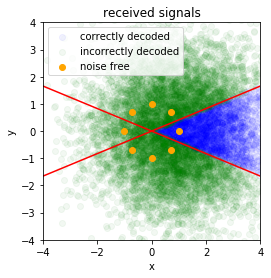

In [19]:
# scatter plot the noisy received data
fig, ax = plt.subplots()

ax.scatter(x_noise[k_dec==0],y_noise[k_dec==0],color = 'blue', alpha = 0.05, label = 'correctly decoded')
ax.scatter(x_noise[k_dec!=0],y_noise[k_dec!=0],color = 'green', alpha = 0.05, label = 'incorrectly decoded')
ax.scatter(x_sym,y_sym,color='orange', label = 'noise free')
lim = 4;
ax.plot([-lim,lim],[-lim*np.tan(np.pi/8),lim*np.tan(np.pi/8)],color = 'red')
ax.plot([-lim,lim],[-lim*np.tan(-np.pi/8),lim*np.tan(-np.pi/8)],color = 'red')
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_title('received signals')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')
ax.legend()
plt.show()